In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("Train_Data.csv")
data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [3]:
data.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data['sex'].unique()


array(['male', 'female'], dtype=object)

In [6]:
data['children'].unique()


array([2, 3, 1, 4, 5, 0], dtype=int64)

In [7]:
data['region'].unique()


array(['northeast', 'southeast', 'northwest', 'southwest'], dtype=object)

In [8]:
data['smoker'].unique()

array(['no', 'yes'], dtype=object)

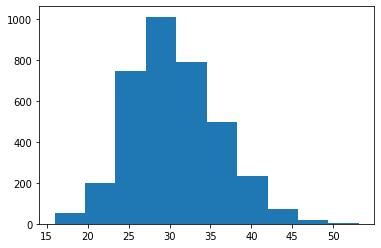

In [9]:
plt.hist( data['bmi'])
plt.show()

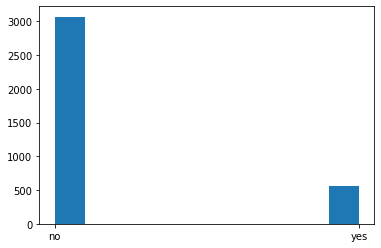

In [10]:
plt.hist( data['smoker'])
plt.show()

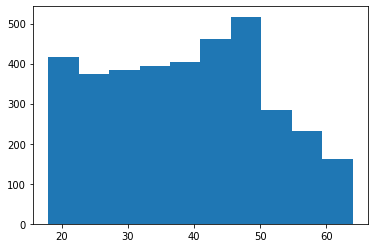

In [11]:
plt.hist( data['age'])
plt.show()

In [12]:
y=data.iloc[:,-1]

In [13]:
Sex=pd.get_dummies(data['sex'],drop_first=True)
data.drop(['sex'],axis=1,inplace=True)
data=pd.concat([data,Sex],axis=1)
data.head()

Region=pd.get_dummies(data['region'],drop_first=True)
data.drop(['region'],axis=1,inplace=True)
data=pd.concat([data,Region],axis=1)
data.head()

Smoker=pd.get_dummies(data['smoker'],drop_first=True)
data.drop(['smoker'],axis=1,inplace=True)
data=pd.concat([data,Smoker],axis=1)
data.head()

,age,bmi,children,charges,male,northwest,southeast,southwest,yes
0,21.000000,25.745000,2,3279.868550,1,0,0,0,0
1,36.976978,25.744165,3,21454.494239,0,0,1,0,1
2,18.000000,30.030000,1,1720.353700,1,0,1,0,0
3,37.000000,30.676891,3,6801.437542,1,0,0,0,0
4,58.000000,32.010000,1,11946.625900,1,0,1,0,0


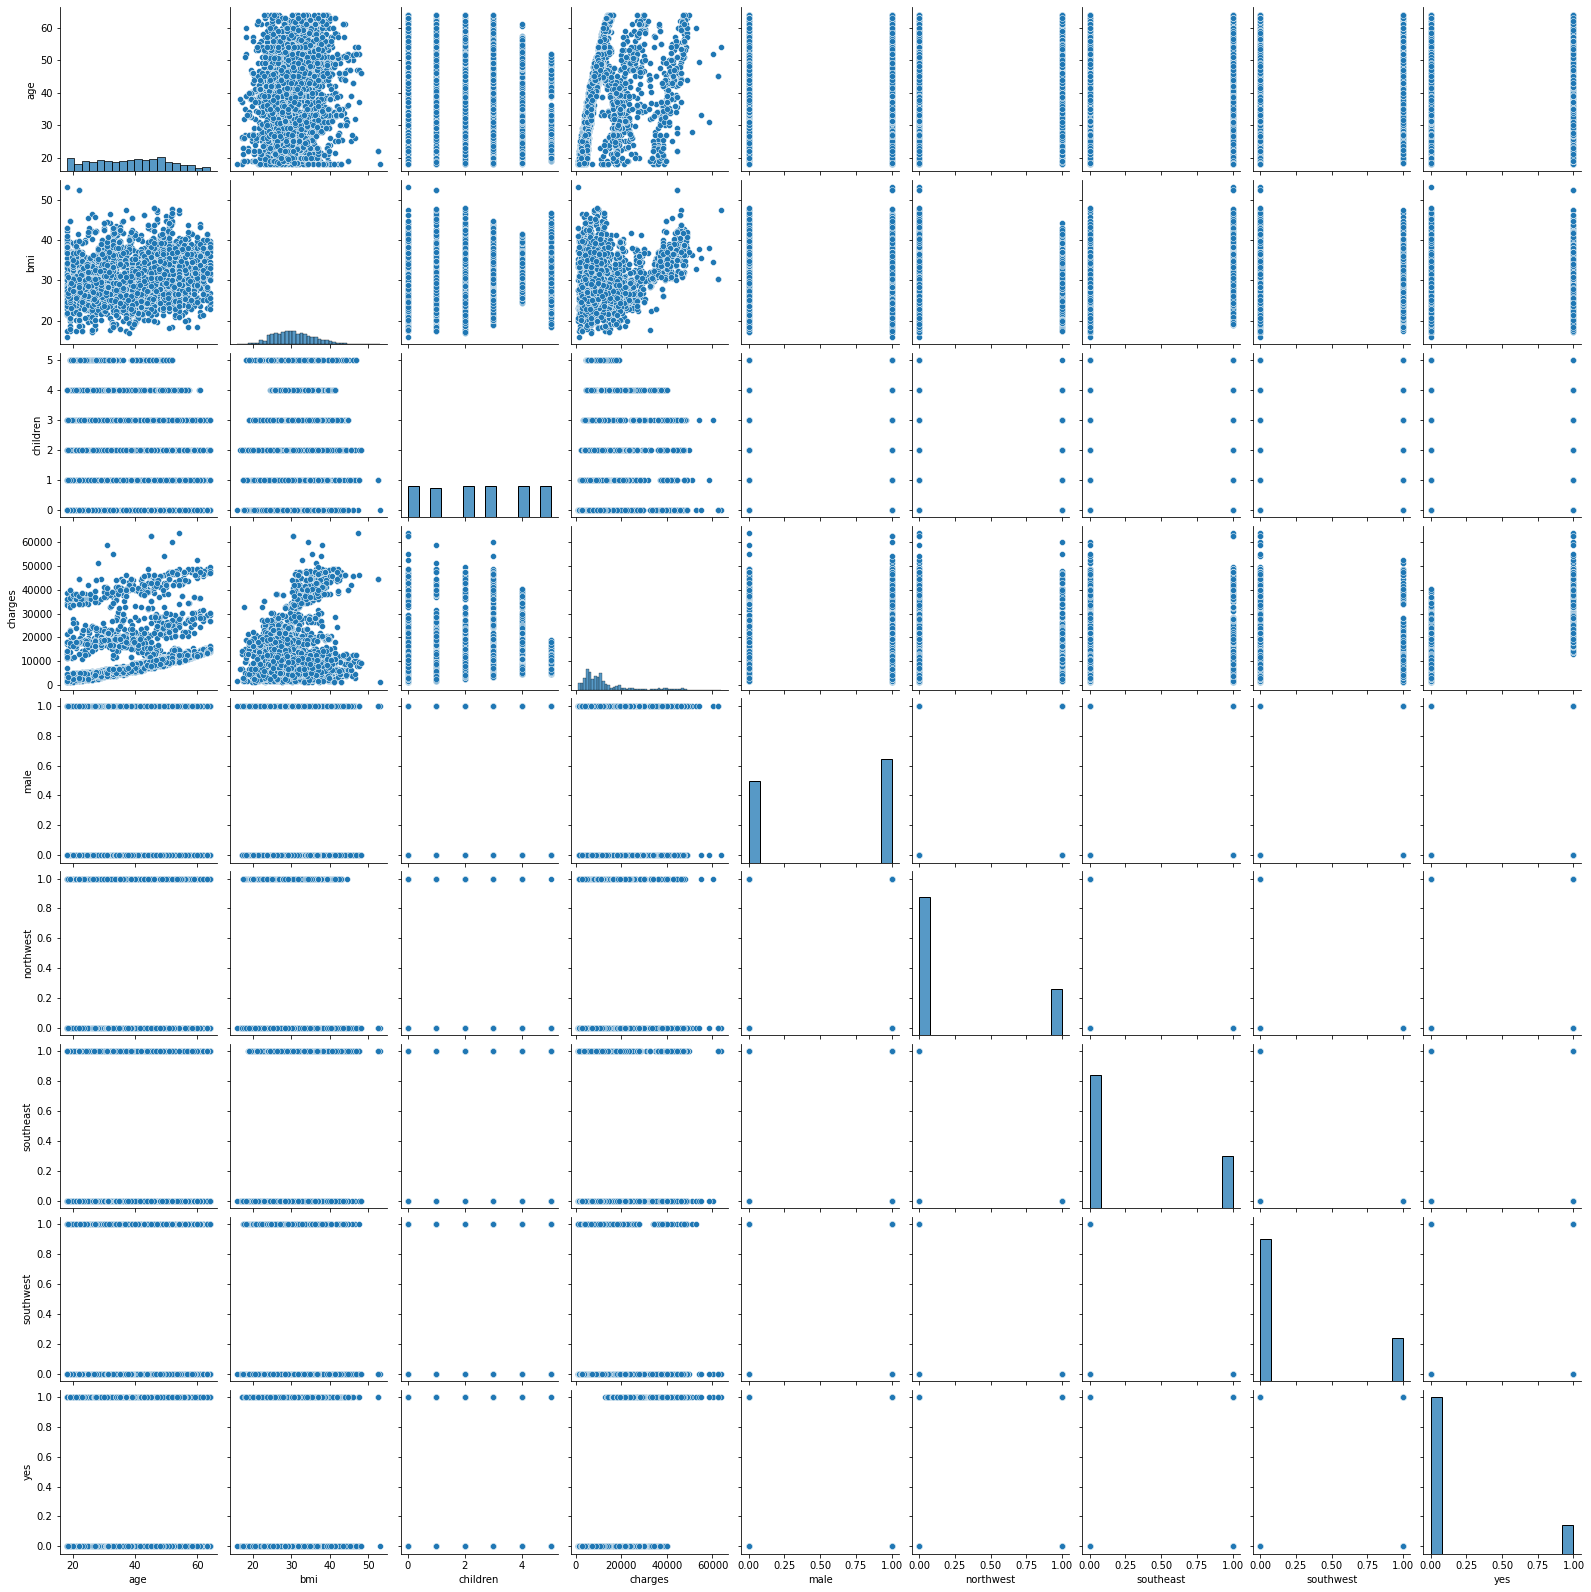

In [14]:
sns.pairplot(data)

In [15]:
data.drop(['charges'],axis=1,inplace=True)

In [16]:
X=data

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2, random_state = 36)

In [18]:
# Random Forest Regressor:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(X_train, y_train)

# Prediction:
y_pred = RandomForestRegressor.predict(X_test)

# Scores:
print(sklearn.metrics.r2_score(y_test, y_pred))
print(sklearn.metrics.mean_squared_error(y_test, y_pred))

<IPython.core.display.Javascript object>

0.8944421539758437


<IPython.core.display.Javascript object>

11524482.45935158


In [19]:
from sklearn.model_selection import RandomizedSearchCV

In [20]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [21]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [22]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 6, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=

RandomizedSearchCV(cv=6, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [23]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [24]:
prediction = rf_random.predict(X_test)

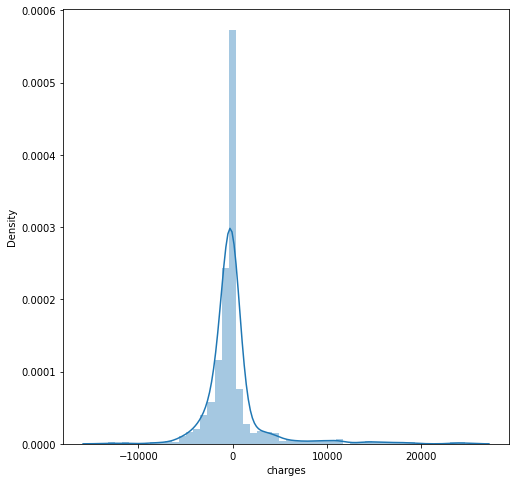

In [25]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

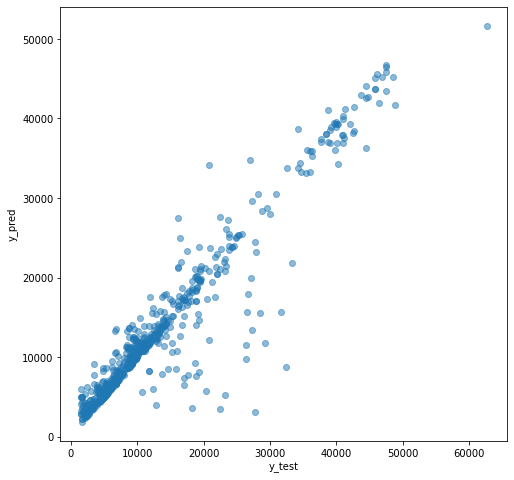

In [26]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

<IPython.core.display.Javascript object>

MAE: 1532.3684504547532


<IPython.core.display.Javascript object>

MSE: 10382095.201029543


<IPython.core.display.Javascript object>

RMSE: 3222.125882244445


In [28]:
import pickle
# open a file, where you ant to store the data
file = open('Medical_Randomforest.pkl', 'wb')

# dump information to that file
pickle.dump(RandomForestRegressor, file)

In [29]:
model = open('Medical_Randomforest.pkl','rb')
forest = pickle.load(model)

In [30]:
y_prediction = forest.predict(X_test)

In [31]:
metrics.r2_score(y_test, y_prediction)

<IPython.core.display.Javascript object>

0.8944421539758437